# Overview of Python data-visualization libraries

##### Using world surface temperature data as a running example

Dataset: https://www.kaggle.com/berkeleyearth/climate-change-earth-surface-temperature-data

Since the goal here is to survey the unique features of different libraries, from an analysis point of view, some of the examples might seem a little contrived.

### Why is data visualization important?

1. For exploring
    - Visualization helps <b>understand</b> your data, relationships and patterns.
    - Key to data-driven <b>decision</b> making.
2. For explaining
    - It is the only way to make big data <b>accessible</b> to a large audience.
    - By itself, data is an account of the facts. Data gains true value when it is used to <b>influence</b> action.
    - Data visualization helps communicate the story to others. Storytelling is like an art form, transforming what can be <b>counter-intuitive</b> into a clear narrative.
    - Example: Hans Rosling’s 200 countries, periodic table
    

### Popular Python plotting libraries:
- Matplotlib
- Pandas built-in visualization
- Seaborn
- Plotly
- Bokeh

In [1]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
# Matplotlib
import matplotlib.pyplot as plt
# Seaborn
import seaborn as sns
# Seaborn
import plotly.plotly as py
import plotly.graph_objs as go 
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
# Bokeh
from bokeh.io import output_notebook, push_notebook
from bokeh.plotting import figure, show
from bokeh.models import ColumnDataSource, HoverTool, Slider, SingleIntervalTicker, CustomJS
from bokeh.layouts import layout, gridplot, widgetbox
from bokeh.palettes import Spectral3, Spectral6
from bokeh.models.glyphs import Circle

In [2]:
# Setup specific to notebook plotting
%matplotlib inline
output_notebook()
init_notebook_mode(connected=True) 

Loading BokehJS ...

In [3]:
globaltemp = pd.read_csv('GlobalTemperatures.csv', parse_dates=['dt'])
globaltemp.tail(3)

,dt,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty
3189,2015-10-01,10.801,0.102,16.450,0.059,5.232,0.115,16.290,0.062
3190,2015-11-01,7.433,0.119,12.892,0.093,2.157,0.106,15.252,0.063
3191,2015-12-01,5.518,0.100,10.725,0.154,0.287,0.099,14.774,0.062


## Matplotlib
Matplotlib is an expansive and well-established library for data visualization, with a syntax similar to Matlab. A major pro of this library is the huge amount of control over every element in a figure. Matplotlib is the go-to library to start exploring data visualization.

<b>Use when</b>: you need very specific customization for your plots.

In [4]:
# Group the temperature by year
year_temp = globaltemp.groupby(globaltemp.dt.dt.year).mean()
year_temp.tail(3)

,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty
dt,,,,,,,,
2013,9.606500,0.097667,15.373833,0.115500,3.911333,0.149833,15.854417,0.064667
2014,9.570667,0.090167,15.313583,0.111667,3.877750,0.139000,15.913000,0.063167
2015,9.831000,0.092167,15.572667,0.106500,4.148833,0.141750,16.058583,0.060833


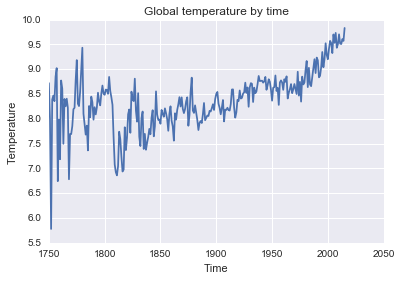

In [5]:
fig, axes = plt.subplots()
axes.plot(year_temp.index, year_temp['LandAverageTemperature'])
axes.set_xlabel('Time')
axes.set_ylabel('Temperature')
axes.set_title('Global temperature by time')

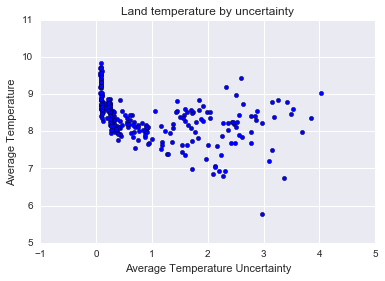

In [6]:
fig, axes = plt.subplots()
axes.scatter(year_temp['LandAverageTemperatureUncertainty'], year_temp['LandAverageTemperature'])
axes.set_xlabel('Average Temperature Uncertainty')
axes.set_ylabel('Average Temperature')
axes.set_title('Land temperature by uncertainty')

## Pandas built-in visualization
Pandas has some built-in capabilities for visualization, built on top of matplotlib, but baked into pandas for easy usage. 

<b>Use when:</b> you want to quickly explore some data in your pandas dataframes.

(1850, 2016)

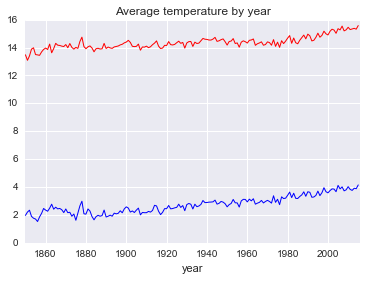

In [7]:
year_temp = globaltemp.groupby(globaltemp.dt.dt.year).mean()
ax = year_temp.LandMaxTemperature.plot(linewidth=1, color='red')
ax = year_temp.LandMinTemperature.plot(linewidth=1, color='blue')
plt.title('Average temperature by year')
plt.xlabel('year')
ax.set_xlim(1850, 2016)

In [8]:
temp_by_country = pd.read_csv('GlobalLandTemperaturesByCountry.csv')
temp_by_country.tail(3)

,dt,AverageTemperature,AverageTemperatureUncertainty,Country
577459,2013-07-01,17.000,0.453,Zimbabwe
577460,2013-08-01,19.759,0.717,Zimbabwe
577461,2013-09-01,NaN,NaN,Zimbabwe


Let's add another dimension to the data by including world GDP data:

In [9]:
world_gdp = pd.read_csv('2014_World_GDP.csv')
world_gdp.head(3)

,COUNTRY,GDP (BILLIONS),CODE
0,Afghanistan,21.71,AFG
1,Albania,13.40,ALB
2,Algeria,227.80,DZA


In [10]:
country_to_gdp = world_gdp.set_index('COUNTRY').to_dict()['GDP (BILLIONS)']
temp_by_country['GDP'] = temp_by_country['Country'].map(lambda c: country_to_gdp.get(c, np.nan))
temp_by_country.tail(3)

,dt,AverageTemperature,AverageTemperatureUncertainty,Country,GDP
577459,2013-07-01,17.000,0.453,Zimbabwe,13.74
577460,2013-08-01,19.759,0.717,Zimbabwe,13.74
577461,2013-09-01,NaN,NaN,Zimbabwe,13.74


### Scatter plot with colormap

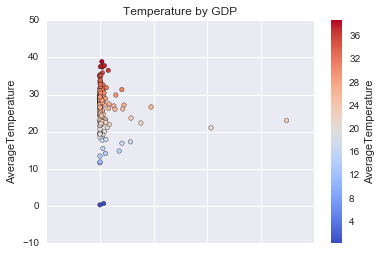

In [11]:
max_temp_by_country = temp_by_country.groupby('Country').max()
ax = max_temp_by_country.plot.scatter(x='GDP', y='AverageTemperature', \
                                      c='AverageTemperature', cmap='coolwarm', \
                                      title='Temperature by GDP')

### Visualizing distributions

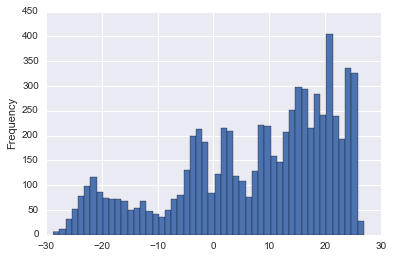

In [12]:
temps_in_north_america = temp_by_country[temp_by_country['Country'].isin(['United States', 'Canada', 'Mexico'])]
temps_in_north_america['AverageTemperature'].plot.hist(bins=50)

## Seaborn
Seaborn is another library with a high-level interface built on top of matplotlib, with more focus on design aesthetics. It provides several ways to plot categorical data, distributions and heatmaps. It also has helper functions to visualize the results of learning algorithms such as clustering and regression.

<b>Use when:</b> you want to use a high-level API to create beautiful plots without tweaking too many knobs.

### Plotting categorical data

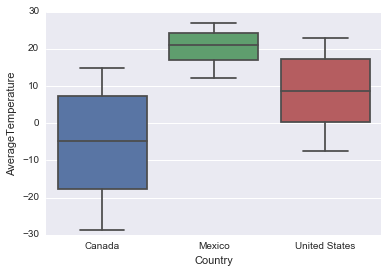

In [13]:
sns.boxplot(x='Country',y='AverageTemperature',data=temps_in_north_america)

### Pair plot
pairplot is a nice utility to view pair-wise relationships in a dataset. There is another similar function called PairGrid as well that is more customizable.

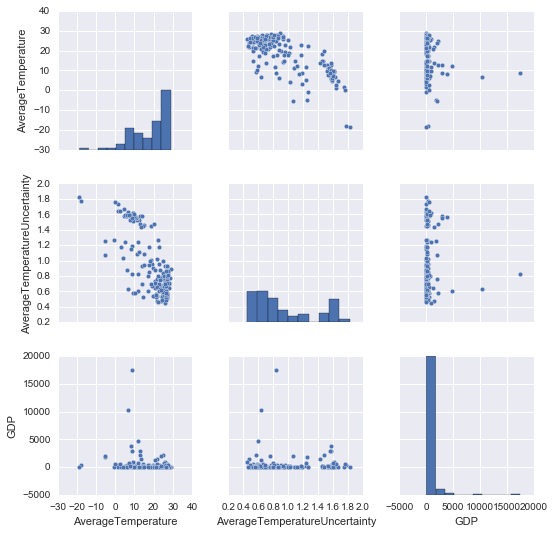

In [14]:
avg_temp_by_country = temp_by_country.dropna().groupby('Country').mean()
sns.pairplot(avg_temp_by_country)

### Joint plots
jointplot allows you to match up two distplots for bivariate data, specifying the type of plot with the <b>kind</b> parameter.
One such example that lets you view clusters in your data is a hex plot.

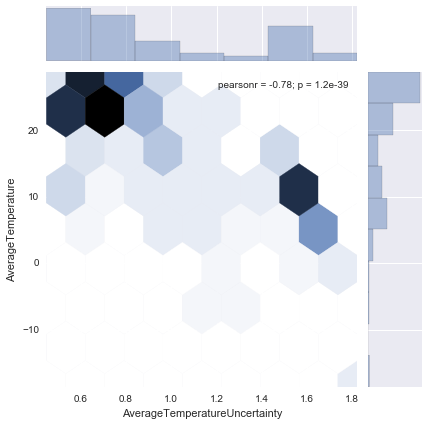

In [15]:
sns.jointplot(x='AverageTemperatureUncertainty',y='AverageTemperature',data=avg_temp_by_country,kind='hex')

### Regression plots
lmplot allows you to display linear models. It also conveniently allows you to split up those plots based on features, as well as coloring the hue based on features.

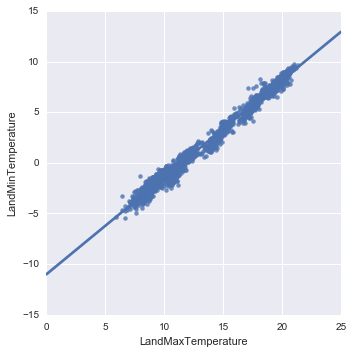

In [16]:
sns.lmplot(x='LandMaxTemperature',y='LandMinTemperature',data=globaltemp)

### Heat maps
Heat maps are another great utility to view cluster patterns in your data
#### Temperatures in North American countries per decade

In [17]:
# Group North America temperature data by decade
temps_in_north_america['dt'] = temps_in_north_america['dt'].astype('datetime64[ns]') # Set column type
temps_in_north_america['Decade'] = temps_in_north_america['dt'].map(lambda x: (x.year//10)*10)
temps_in_north_america_by_time = temps_in_north_america.groupby(['Decade', 'Country'], as_index=False).mean()
temps_in_north_america_by_time.reset_index()
temps_in_north_america_by_time.head(3)

,Decade,Country,AverageTemperature,AverageTemperatureUncertainty,GDP
0,1760,Canada,-4.914167,3.560083,1794.0
1,1760,United States,8.821917,3.714583,17420.0
2,1770,Canada,-6.044148,3.098836,1794.0


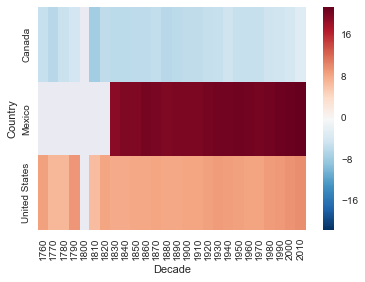

In [18]:
# For heatmaps, your data first needs to be in a matrix form. Here we use a pivot table for this
temp_pivot_table = temps_in_north_america_by_time.pivot_table(values='AverageTemperature',index='Country',columns='Decade')
sns.heatmap(temp_pivot_table)

# Interactive Plots
When exploring your data by yourself, any of the previously mentioned libraries should suffice. When sharing and explaining insights from your data to others, interactive plots are extremely helpful. They allow a user (a customer, client or a colleague) to interact with the data and form their own insights from the data.

## Bokeh
Bokeh is an interactive visualization library that targets modern web browsers. It provides high performance interactivity for very large or streaming datasets. It has a high level plotting API as well as a lower level API for more customization. It also enables providing CustomJS callbacks for additionaly functionality.

<b>Use when:</b> creating an interactive dashboard to share insights from your feature-rich dataset to others.

In [19]:
# Add a column to specify a color palette based on the country
country_palette = Spectral3
COUNTRY_TO_COLOR = {'United States':country_palette[0], 'Mexico':country_palette[1], 'Canada':country_palette[2]}
temps_in_north_america['Color'] = temps_in_north_america['Country'].apply(lambda country: COUNTRY_TO_COLOR[country])
temps_in_north_america.head(3)

,dt,AverageTemperature,AverageTemperatureUncertainty,Country,GDP,Decade,Color
97255,1768-09-01,5.257,3.107,Canada,1794.0,1760,#fc8d59
97256,1768-10-01,-3.393,2.981,Canada,1794.0,1760,#fc8d59
97257,1768-11-01,-12.829,3.967,Canada,1794.0,1760,#fc8d59


### Linking plot selections

In [20]:
source = ColumnDataSource(temps_in_north_america)
TOOLS = "box_select,lasso_select,pan,tap,wheel_zoom,reset"

# Specify how points that are not selected should look
nonselection_glyph = Circle(fill_color='Color', fill_alpha=0.1, line_color=None)
    
# Create temp by time plot
top = figure(title='Average Temperature in USA', plot_height=300, x_axis_type="datetime", tools=TOOLS)
top.xaxis.axis_label = "Time"
top.yaxis.axis_label = "Average Temp"
renderer = top.circle(
    x='dt',
    y='AverageTemperature', 
    color='Color',
    source=source,
    line_width=0.5,
    line_alpha=0.8,
    fill_alpha=0.7
)
renderer.nonselection_glyph = nonselection_glyph

# Create temp uncertainty by time plot
bottom = figure(title='Average Temperature Uncertainty in USA', plot_height=300, x_axis_type="datetime", tools=TOOLS)
bottom.xaxis.axis_label = "Time"
bottom.yaxis.axis_label = "Average Temp Uncertainty"
renderer = bottom.circle(
    x='dt',
    y='AverageTemperatureUncertainty', 
    color='Color',
    source=source,
    line_width=0.5,
    line_alpha=0.8,
    fill_alpha=0.7
)
renderer.nonselection_glyph = nonselection_glyph

layout = gridplot([[top], 
                   [bottom]])
show(layout)

### Interactive plot of temperature change over time 

In [21]:
# Group the data by year and country
temps_in_north_america['Year'] = temps_in_north_america['dt'].map(lambda x: x.year)
years = temps_in_north_america['Year'].unique()
temps_in_north_america_by_time = temps_in_north_america.groupby(['Year', 'Country'], as_index=False).mean()
temps_in_north_america_by_time.reset_index()
temps_in_north_america_by_time['Color'] = temps_in_north_america_by_time['Country'].apply(lambda country: COUNTRY_TO_COLOR[country])
temps_in_north_america_by_time.head(3)

,Year,Country,AverageTemperature,AverageTemperatureUncertainty,GDP,Decade,Color
0,1768,Canada,-7.886750,3.66925,1794.0,1760,#fc8d59
1,1768,United States,5.572750,3.75700,17420.0,1760,#99d594
2,1769,Canada,-3.427875,3.50550,1794.0,1760,#fc8d59


#### Store data sources by year

In [22]:
sources = {}
for year in years:
    df = temps_in_north_america_by_time[temps_in_north_america_by_time['Year'] == year]
    df = df.fillna(0)
    sources[year] = ColumnDataSource(df)

source = sources[1850]

#### Create a scatter plot specifying x, y and color based on columns in data source

In [23]:
plot = figure(title='North America Temperatures Data', plot_height=400, plot_width=700)
plot.xaxis.axis_label = "Average Temp Uncertainty"
plot.yaxis.ticker = SingleIntervalTicker(interval=5)
plot.yaxis.axis_label = "Average Temp"
plot.circle(
    x='AverageTemperatureUncertainty',
    y='AverageTemperature', 
    color='Color',
    legend='Country',
    source=source,
    fill_alpha=0.8,
    line_color='#7c7e71',
    line_width=0.5,
    line_alpha=0.5,
    size=20.0,    
)
plot.legend.location='top_right'
plot.legend.orientation = 'horizontal'
# Add hover tool tips
plot.add_tools(HoverTool(tooltips=[("Country", "@Country"), ("Avg Temp", "@AverageTemperature"), \
                                   ("Avg Temp Unc", "@AverageTemperatureUncertainty")], \
                         show_arrow=False, point_policy='follow_mouse'))

#### Add a callback to link the slider to the plot
Note that the interaction mechanism is simpler outside the notebook

In [24]:
def update_plot(year):
    source.data = sources[year].data
    push_notebook(handle=nb_handle)

In [25]:
callback = CustomJS(code="""
if (IPython.notebook.kernel !== undefined) {
    var kernel = IPython.notebook.kernel;
    cmd = "update_plot(" + cb_obj.value + ")";
    kernel.execute(cmd, {}, {});
}
""")
    
slider = Slider(start=1850, end=years[-2], value=1870, step=10, title="Year", callback=callback)
layout = gridplot([[plot],
                   [slider], ])
nb_handle = show(layout, notebook_handle=True)

## Plotly
Plotly is a library that allows you to create interactive plots that you can use in dashboards or websites.

<b>Use when:</b> you have a rich data-set and want to share an interactive visualization with others. Especially, use plotly's choropleth API for geographical data.

### Plotting geographical data
Plotly's choropleth API can be used to visualize geographical data. The syntax can be a little hard to learn, but once you set it up, it is quite repeatable.

#### US state-wise temperature data

In [26]:
# Unites States map
temp_by_state = pd.read_csv('GlobalLandTemperaturesByState.csv')
temp_by_us_state = temp_by_state[temp_by_state['Country'] == 'United States'].groupby('State', as_index=False).mean()

Get state codes for choropleth to identify states

In [27]:
us_state_abbrev = pd.read_csv('USStateCodes.csv')
us_state_abbrev.head(3)

,Index,State,CODE
0,0,Minnesota,MN
1,1,Missouri,MO
2,2,Hawaii,HI


In [28]:
state_to_code = us_state_abbrev.set_index('State').to_dict()['CODE']
temp_by_us_state['Code'] = temp_by_us_state['State'].apply(lambda x: state_to_code[x])
temp_by_us_state.head(3)

,State,AverageTemperature,AverageTemperatureUncertainty,Code
0,Alabama,17.066138,1.439645,AL
1,Alaska,-4.890738,1.671122,AK
2,Arizona,15.381526,0.725007,AZ


Create data dictionaries for choropleth

In [29]:
data = dict(type='choropleth',
            colorscale = 'YIOrRd',
            locations = temp_by_us_state['Code'],
            z = temp_by_us_state['AverageTemperature'],
            locationmode = 'USA-states',
            text = temp_by_us_state['State'],
            marker = dict(line = dict(color = 'rgb(255,255,255)',width = 2)),
            colorbar = {'title':"Temperature"}
            ) 

In [30]:
layout = dict(title = 'Average Temperatures by State',
              geo = dict(scope='usa',
                         showlakes = False,
                         lakecolor = 'rgb(85,173,240)')
             )

In [31]:
choromap = go.Figure(data = [data],layout = layout)

In [32]:
iplot(choromap)

#### Plotting world temperature data

In [33]:
avg_temp_by_country = temp_by_country.groupby('Country', as_index=False).mean()
avg_temp_by_country.head(3)

,Country,AverageTemperature,AverageTemperatureUncertainty,GDP
0,Afghanistan,14.045007,0.930162,21.71
1,Africa,24.074203,0.395564,NaN
2,Albania,12.610646,1.524574,13.40


In [34]:
# Get country codes for choropleth 
country_to_code = world_gdp.set_index('COUNTRY').to_dict()['CODE']
avg_temp_by_country['CODE'] = avg_temp_by_country['Country'].map(lambda c: country_to_code.get(c, np.nan))
avg_temp_by_country.head(3)

,Country,AverageTemperature,AverageTemperatureUncertainty,GDP,CODE
0,Afghanistan,14.045007,0.930162,21.71,AFG
1,Africa,24.074203,0.395564,NaN,NaN
2,Albania,12.610646,1.524574,13.40,ALB


In [35]:
data = dict(
        type = 'choropleth',
        locations = avg_temp_by_country['CODE'],
        z = avg_temp_by_country['AverageTemperature'],
        text = avg_temp_by_country['CODE'],
        colorbar = {'title' : 'Average Temperature'},
      ) 

In [36]:
layout = dict(
    title = 'Global average temperatures',
    geo = dict(
        showframe = False,
        projection = {'type':'Mercator'}
    )
)

In [37]:
choromap = go.Figure(data = [data],layout = layout)
iplot(choromap)

### Final Tip
When unsure about what kind visualization you need or simply looking for inspiration, the gallery pages for each of the plotting libraries are an excellent resource!